
sin(x) Function:
At x = 0.5
Numerical Derivative: 0.877583, True Derivative: 0.877583
Numerical Integral [0,1]: 0.458817, True Integral: 0.459698


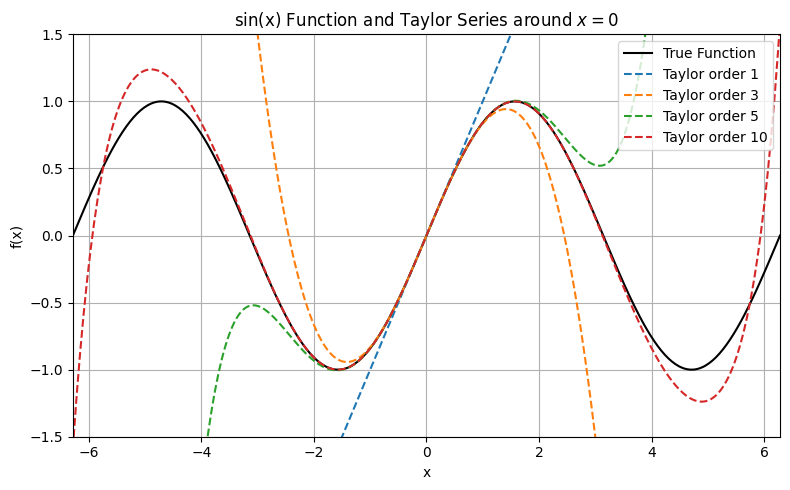


x^2 Function:
At x = 0.5
Numerical Derivative: 1.000000, True Derivative: 1.000000
Numerical Integral [0,1]: 0.332500, True Integral: 0.333333


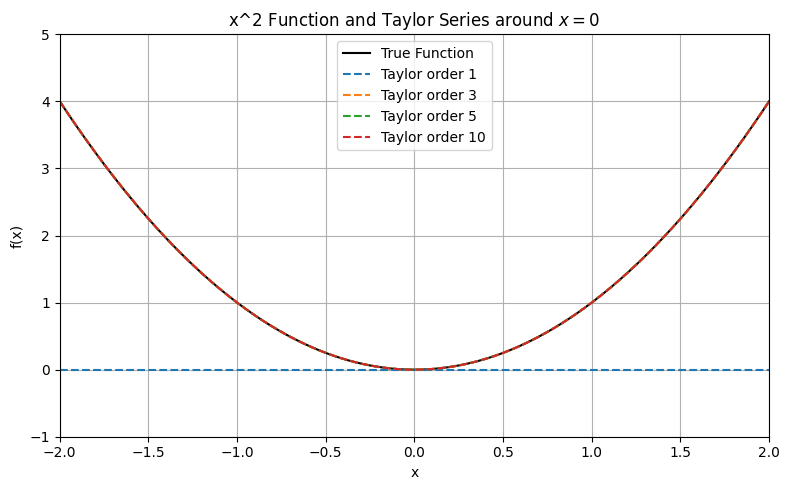


exp(-3x) Function:
At x = 0.5
Numerical Derivative: -0.669390, True Derivative: -0.669390
Numerical Integral [0,1]: 0.316896, True Integral: 0.316738


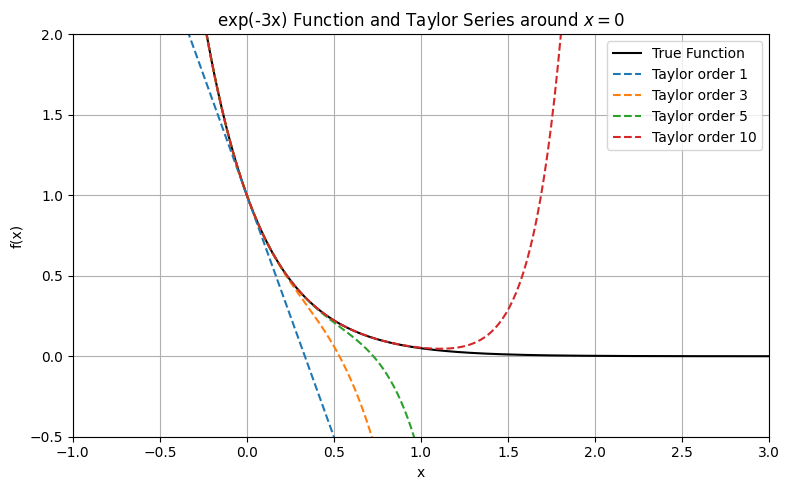

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Functions to test
def f_sin(x): return np.sin(x)
def f_x2(x): return x**2
def f_exp(x): return np.exp(-3 * x)

# Analytic derivatives
def df_sin(x): return np.cos(x)
def df_x2(x): return 2 * x
def df_exp(x): return -3 * np.exp(-3 * x)

# Analytic integrals
def int_sin(a, b): return -np.cos(b) + np.cos(a)
def int_x2(a, b): return (b**3 - a**3)/3
def int_exp(a, b): return (-1/3)*(np.exp(-3*b) - np.exp(-3*a))

# Numerical Derivative (central difference)
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Riemann sum integrator (left)
def riemann_sum(f, a, b, N=1000):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(f(x[:-1]) * dx)

# Compute nth derivative numerically
def derivative_n(f, x, n, h=1e-2):
    if n == 0:
        return f(x)
    elif n == 1:
        return numerical_derivative(f, x, h)
    else:
        return (derivative_n(f, x + h, n - 1, h) - derivative_n(f, x - h, n - 1, h)) / (2 * h)

# Taylor series generator
def taylor_series(f, x0, order, x_vals):
    series = np.zeros_like(x_vals, dtype=float)
    for n in range(order + 1):
        derivative = derivative_n(f, x0, n)
        series += (derivative / factorial(n)) * (x_vals - x0)**n
    return series

# Evaluation and comparison
def compare(f, df_exact, int_exact, name, a=0, b=1, x_plot_range=(-2, 2), y_lims=None):
    x0 = 0.5 * (a + b)
    x_vals = np.linspace(x_plot_range[0], x_plot_range[1], 400)

    # Derivative comparison
    num_deriv = numerical_derivative(f, x0)
    true_deriv = df_exact(x0)
    
    # Integration comparison
    num_int = riemann_sum(f, a, b)
    true_int = int_exact(a, b)
    
    print(f"\n{name} Function:")
    print(f"At x = {x0}")
    print(f"Numerical Derivative: {num_deriv:.6f}, True Derivative: {true_deriv:.6f}")
    print(f"Numerical Integral [{a},{b}]: {num_int:.6f}, True Integral: {true_int:.6f}")

    # Plot Taylor approximations
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, f(x_vals), label="True Function", color='black')
    for order in [1, 3, 5, 10]:
        t_approx = taylor_series(f, x0=0, order=order, x_vals=x_vals)
        plt.plot(x_vals, t_approx, label=f'Taylor order {order}', linestyle='--')
    
    plt.title(f"{name} Function and Taylor Series around $x=0$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    if y_lims:
        plt.ylim(*y_lims)
    plt.xlim(*x_plot_range)
    plt.tight_layout()
    plt.show()

# Run comparisons with adjusted y-limits and x-ranges
compare(f_sin, df_sin, int_sin, "sin(x)", x_plot_range=(-2*np.pi, 2*np.pi), y_lims=(-1.5, 1.5))
compare(f_x2, df_x2, int_x2, "x^2", x_plot_range=(-2, 2), y_lims=(-1, 5))
compare(f_exp, df_exp, int_exp, "exp(-3x)", x_plot_range=(-1, 3), y_lims=(-0.5, 2))



# Numerical Derivative and Riemann Sum Integrator

This notebook demonstrates how to implement:

1. A **numerical derivative estimator** using central differences.
2. A **numerical integrator** using the Riemann sum.
3. Comparison of both with the analytical results for the functions:
   - $\sin(x)$
   - $x^2$
   - $e^{-3x}$
4. Taylor series expansion of these functions around $x = 0$ and plotting for various orders.

---

## Numerical Derivative

We use the **central difference** method to estimate the derivative at a point $x$:

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

This approach has second-order accuracy in $h$.

---

## Numerical Integration

We approximate the integral using the **left Riemann sum**:

$$
\int_a^b f(x) \, dx \approx \sum_{i=0}^{N-1} f(x_i) \Delta x
$$

where:

- $x_i = a + i \Delta x$
- $\Delta x = \frac{b - a}{N}$

---

## Analytical Expressions

| Function        | Derivative                      | Integral $[a,b]$                          |
|----------------|----------------------------------|-------------------------------------------|
| $\sin(x)$      | $\cos(x)$                       | $-\cos(b) + \cos(a)$                    |
| $x^2$           | $2x$                             | $\frac{b^3 - a^3}{3}$                    |
| $e^{-3x}$       | $-3e^{-3x}$                      | $\frac{1}{-3} (e^{-3b} - e^{-3a})$       |

---

## Taylor Series Expansion

The **Taylor series** of a function $f(x)$ around a point $x = 0$ (Maclaurin series) is given by:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!} x^n
$$

We truncate the series to a finite number of terms (orders $N = 1, 3, 5, 10$) to approximate the function.

---

## Functions Used in This Notebook

We analyze the following functions:

1. $f(x) = \sin(x)$
2. $f(x) = x^2$
3. $f(x) = e^{-3x}$

For each function, we:

- Estimate the derivative numerically at a point (e.g., $x = 0.5$)
- Compute the integral numerically over an interval (e.g., $[0, 1]$)
- Compare with analytic expressions
- Plot the function and its Taylor series approximations of increasing order


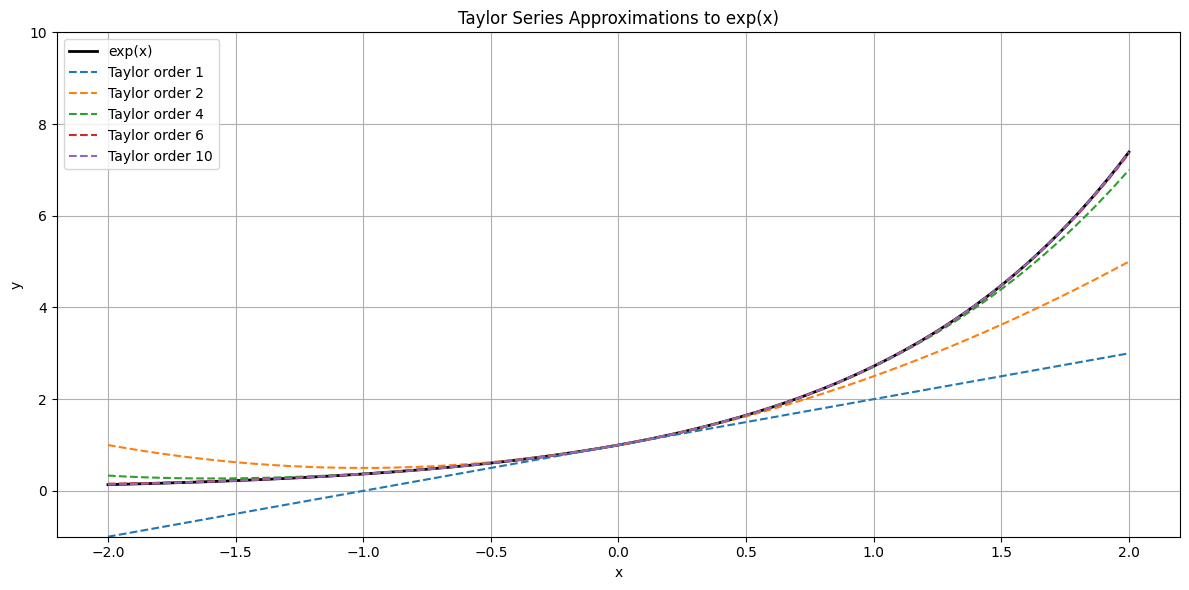

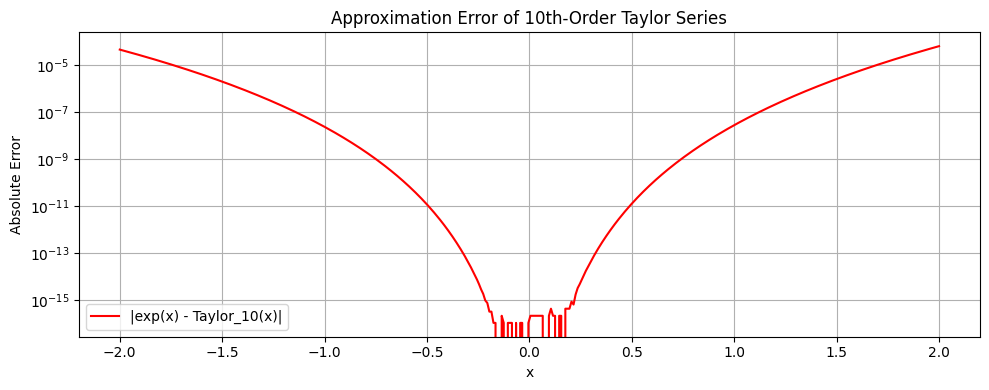

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the function and its Taylor expansion
def f(x):
    return np.exp(x)

def taylor_exp(x, n):
    return sum(x**k / math.factorial(k) for k in range(n+1))

x = np.linspace(-2, 2, 400)

# Orders of Taylor expansions to compare
orders = [1, 2, 4, 6, 10]

# Plot function and Taylor approximations
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), label="exp(x)", color='black', linewidth=2)

for n in orders:
    approx = [taylor_exp(xi, n) for xi in x]
    plt.plot(x, approx, label=f"Taylor order {n}", linestyle='--')

plt.title("Taylor Series Approximations to exp(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1, 10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot error for 10th order
plt.figure(figsize=(10, 4))
approx_10 = np.array([taylor_exp(xi, 10) for xi in x])
error = np.abs(f(x) - approx_10)

plt.plot(x, error, label="|exp(x) - Taylor_10(x)|", color='red')
plt.title("Approximation Error of 10th-Order Taylor Series")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
